# 컨테이너 명령어 실습

- LAMP 스택 : 아파치, PHP, MySQL에 리눅스를 합친 조합
- 리눅스 + 웹 서버 + 프로그래밍 언어 런타임 + 데이터베이스 조합
- 컨테이너도 프로그램 본체 + 프로그램 런타임 + 웹 서버 컨테이너와 데이터베이스 컨테이너로 구성해 운영 

## Redmine과 MySQL 컨테이너 실행

- 레드마인 : 티켓(누구에게 어떤 업무를 맡길지를 나타내는 ToDO)을 관리하는 소프트웨어

In [ ]:
# 네트워크 생성
docker network create redmine000net2

# MySQL 컨테이너 생성 및 실행 
docker run --name mysql000ex13 -dit --net=redmine000net2 -e MYSQL_ROOT_PASSWORD=myrootpass -e MYSQL_DATABASE=redmine000db -e MYSQL_USER=redmine000kun -e MYSQL_PASSWORD=rkunpass mysql --character-set-server=utf8mb4 --collation-server=utf8mb4_unicode_ci --default-authentication-plugin=mysql_native_password

# Redmine 컨테이너 생성 및 실행
docker run -dit --name redmine000ex14 --network redmine000net2 -p 8086:3000 -e REDMINE_DB_MYSQL=mysql000ex13 -e REDMINE_DB_DATABASE=redmine000db -e REDMINE_DB_USERNAME=redmine000kun -e REDMINE_DB_PASSWORD=rkunpass redmine
    
# Redmine 동작 확인
http://localhost:8086

### Error

- 동작 확인이 안됨
- MySQL 컨테이너가 실행되지 않고 바로 Exited
- 워드프레스는 되는 것으로 보아 MySQL 컨테이너 문제라고 판단

**해결**
- MySQL 컨테이너 인자 띄어쓰기 문제
- --collation-server= utf8mb4_unicode_ci => --collation-server=utf8mb4_unicode_ci

### 성공 결과

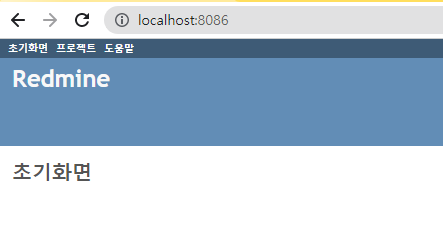

## Redmine과 MariaDB 컨테이너 실행

- MariaDB 컨테이너지만 옵션 이름에 MYSQL 들어감 

In [ ]:
# 네트워크 생성
docker network create redmine000net3

# MariaDB 컨테이너 생성 및 실행 교
docker run --name mariadb000ex15 -dit --net=redmine000net3 -e MYSQL_ROOT_PASSWORD=mariarootpass -e MYSQL_DATABASE=redmine000db -e MYSQL_USER=redmine000kun -e MYSQL_PASSWORD=rkunpass mariadb --character-set-server=utf8mb4 --collation-server=utf8mb4_unicode_ci --default-authentication-plugin=mysql_native_password

# Redmine 컨테이너 생성 및 실행
docker run -dit --name redmine000ex16 --network redmine000net3 -p 8087:3000 -e REDMINE_DB_MYSQL=mariadb000ex15 -e REDMINE_DB_DATABASE=redmine000db -e REDMINE_DB_USERNAME=redmine000kun -e REDMINE_DB_PASSWORD=rkunpass redmine

# Redmine 동작 확인
http://localhost:8087

### Error

- 동작 확인이 안됨
- 워드프레스는 되는 것으로 보아 MariaDB 컨테이너 문제라고 판단

**해결**
- MariaDB 컨테이너 인자 오타 문제
- --collationserver= utf8mb4_unicode_ci => --collation-server=utf8mb4_unicode_ci

### 성공 결과

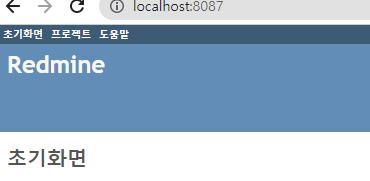

## 워드프레스와 MariaDB 컨테이너 실행

In [ ]:
# 네트워크 생성
docker network create wordpress000net4

# MariaDB 컨테이너 생성 및 실행 
docker run --name mariadb000ex17 -dit --net=wordpress000net4 -e MYSQL_ROOT_PASSWORD=mariarootpass -e MYSQL_DATABASE=wordpress000db -e MYSQL_USER=wordpress000kun -e MYSQL_PASSWORD=wkunpass mariadb --character-set-server=utf8mb4 --collation-server=utf8mb4_unicode_ci --default-authentication-plugin=mysql_native_password

# WordPress 컨테이너 생성 및 실행
docker run --name wordpress000ex18 -dit --net=wordpress000net4 -p 8088:80 -e WORDPRESS_DB_HOST=mariadb000ex17 -e WORDPRESS_DB_NAME=wordpress000db -e WORDPRESS_DB_USER=wordpress000kun -e WORDPRESS_DB_PASSWORD=wkunpass wordpress

# WordPress 동작 확인
http://localhost:8088

### 성공 결과

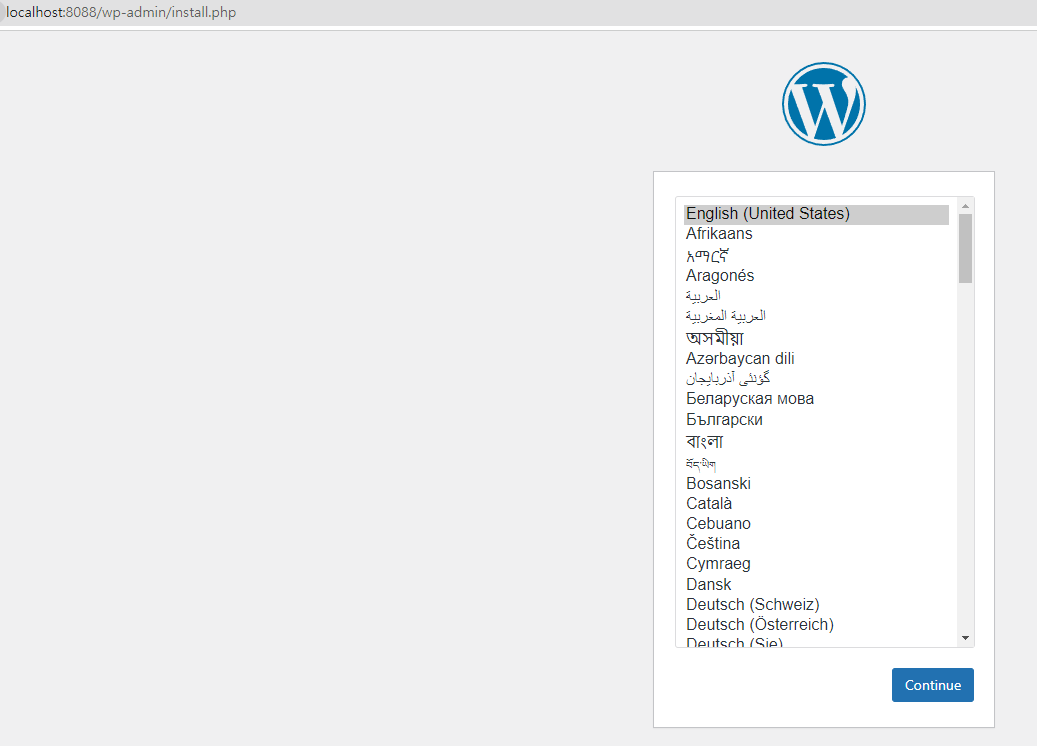

# 컨테이너와 호스트 간 파일 복사

- 파일 복사는 호스트 - 컨테이너 양방향 모두 가능 
- 호스트 쪽 파일은 어디에 위치한 파일이라도 복사 가능
- 컨테이너 쪽에서도 파일 복사 경로 지정 가능

**파일 복사 커맨드**
- docker cp (docker container cp)
- docker cp 호스트_경로 컨테이너_이름:컨테이너_경로
- docker cp 컨테이너_이름:컨테이너_경로 호스트_경로
- docker cp 원본_경로 복사할_경로

**index.html 파일 생성**

In [ ]:
<html>
<meta charset='utf-8'/>
<body>
<div>안녕하세요!</div>
</body>
</html>

## 호스트의 파일을 컨테이너 속으로 복사

In [ ]:
# 아파치 컨테이너를 생성
docker run --name apa000ex19 -d -p 8089:80 httpd

# 아파치 접근
http://localhost:8089
    
# 호스트에서 컨테이너로 파일을 복사
docker cp C:\Users\canmanmo\Desktop\index.html apa000ex19:/usr/local/apache2/htdocs/
        
# 바뀐 내용 확인
http://localhost:8089       

### 성공 결과

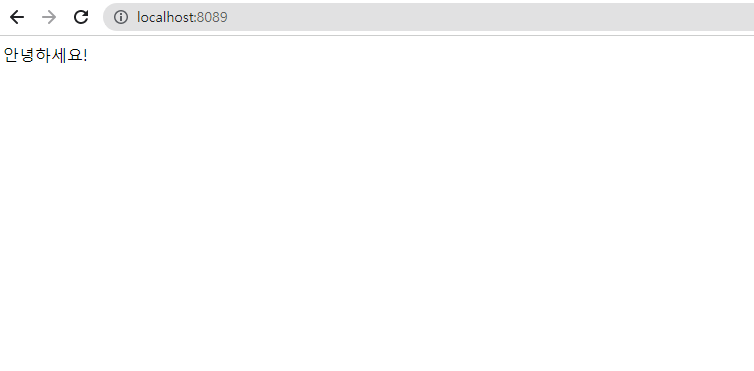

## 컨테이너 파일을 호스트로 복사

In [ ]:
# 컨테이너에서 호스트로 파일을 복사하기
docker cp apa000ex19:/usr/local/apache2/htdocs/index.html C:\Users\canmanmo\Desktop\ML\Docker\index.html

### 성공 결과

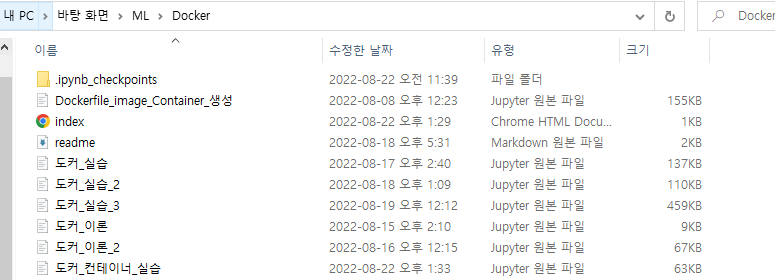